In [7]:
import numpy as np
import scipy.integrate as integrate
from math import pi as PI
from math import log
import matplotlib.pyplot as plt
import sys
from collections.abc import Iterable

In [8]:
def integrate_rectangle(f, start, end, no_points):
    i = start
    output = 0.0
    interval = (end - start)/ no_points
    while i < end:
        output += interval*f(i+interval/2) if i + interval < end else (end-i)*f(i+interval/2)
        i += interval
    return output

In [9]:
r = (-1,1)
def gauss_legendre(f: callable, a, b, n):
    # Calculate the nodes and weights of the Gauss-Legendre quadrature
    nodes, weights = np.polynomial.legendre.leggauss(n)

    # Map the nodes 
    mapped_nodes = ((b - a) * nodes + b*r[1] - a*r[0]) / (r[1] - r[0])
    mapped_weights = (b - a) / (r[1] - r[0]) * weights
    
    # Calculate the integral
    integral = sum(mapped_weights * f(mapped_nodes))
    
    return integral


In [10]:
def fkfun(x0,a):
    return (1/np.sqrt(a))*(np.arctan((1-x0)/np.sqrt(a))+np.arctan(x0/np.sqrt(a)))

# Funkcja 4/(1+x^2)

In [4]:
def f1(x):
    return 4/(1 + x*x)

def f2(x):
    if not isinstance(x,Iterable) and x == 0:
        return 0
    return np.sqrt(x)*np.log(x)

def f3(x):
    return 1/((x-0.3)**2+0.001) + 1/((x-0.9)**2+0.004) - 6


In [19]:
def integrate_f(f, rval):
    n = 26
    y_M = np.zeros(n)
    y_T = np.zeros(n)
    y_S = np.zeros(n)
    err_M = []
    err_T = []
    err_S = []
    hs = np.empty(n)
    for m in range(1, n):
        x_space = np.linspace(0, 1, 2**m + 1)
        y_space = np.array([f(x) for x in x_space])
        hs[m] = ( 1/(2**m+1))
        y_M[m] = integrate_rectangle(f, 0, 1, 2**m + 1)
        y_T[m] = integrate.trapz(y_space, x_space)
        y_S[m] = integrate.simps(y_space, x_space)
        err_M.append((abs(rval - y_M[m])/abs(rval)))
        err_T.append((abs(rval - y_T[m])/abs(rval)))
        err_S.append((abs(rval - y_S[m])/abs(rval)))

    th_mid = log(err_M[5]/err_M[4])/log(hs[5]/hs[4])
    th_tra = log(err_T[5]/err_T[4])/log(hs[5]/hs[4])
    th_sim = log(err_S[5]/err_S[4])/log(hs[5]/hs[4])
    print("Rząd zbieżności empiryczny - prostokąty", round(th_mid, 2))
    print("Rząd zbieżności empiryczny - trapezy", round(th_tra, 2))
    print("Rząd zbieżności empiryczny - Simpson", round(th_sim, 2))


    hmin_m = hs[err_M.index(min(err_M))]
    hmin_t = hs[err_T.index(min(err_T))]
    hmin_s = hs[err_S.index(min(err_S))]
    print("hmin - prostokąty", "{:.3}".format(hmin_m))
    print("hmin - trapezy", "{:.3}".format(hmin_t))
    print("hmin - Simpson", "{:.3}".format(hmin_s))

    n = 16
    err_GL = np.empty(n-1)
    n_space = np.empty(n-1)
    for m in range(1, n):
        err_GL[m-1] = (abs(integrate.fixed_quad(f, 2.2250738585072014e-308, 1, n=2**m+1)[0] - rval)/(abs(rval)))
        n_space[m-1] = m

    x_26 = [i for i in range(25)]
    x_15 = [i for i in range(15)]

    plt.plot(x_26, err_M, label="Prostokąty")
    plt.plot(x_26, err_T, label="Trapezy")
    plt.plot(x_26, err_S, label="Simpson")
    plt.plot(x_15, err_GL, label="Gauss-Legendre")
    plt.semilogy()
    plt.legend()

In [5]:
def integrate_s(f,rval):
    n = 15
    y_AT = np.empty(n)
    y_AG = np.empty(n)
    err_AT = np.empty(n)
    err_AG = np.empty(n)
    for m in range(n):
        x_space = np.linspace(0, 1, 2**m + 1)
        tol = 10**-m
        y_AT[m],_ = integrate.quad_vec(f,0,1,epsrel=tol,quadrature='trapezoid')
        y_AG[m],_ = integrate.quad_vec(f,0,1,epsrel=tol,quadrature='gk21')
        err_AG[m] = abs(y_AG[m] - rval)/abs(rval)
        err_AT[m] = abs(y_AT[m] - rval)/abs(rval)
    
    x_15 = [i for i in range(15)]
    plt.plot(x_15, err_AT, label="Adaptacyjne trapezy")
    plt.plot(x_15, err_AG, label="Adaptacyjne Gauss-Kronrod")
    plt.semilogy()
    plt.legend()

Rząd zbieżności empiryczny - prostokąty 2.04
Rząd zbieżności empiryczny - trapezy 2.09
Rząd zbieżności empiryczny - Simpson 6.27
hmin - prostokąty 4.77e-07
hmin - trapezy 2.38e-07
hmin - Simpson 0.00775


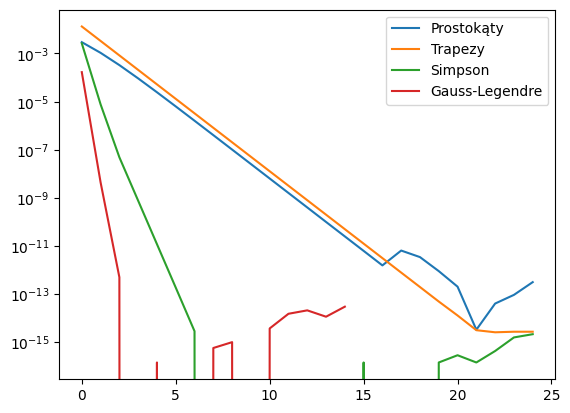

In [13]:
integrate_f(f1,PI)

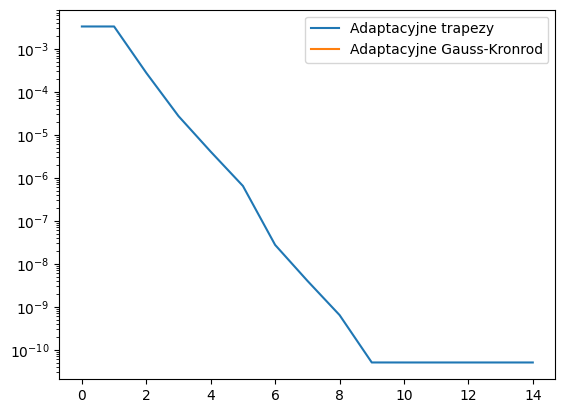

In [14]:
integrate_s(f1,PI)

Rząd zbieżności empiryczny - prostokąty 1.29
Rząd zbieżności empiryczny - trapezy 1.39
Rząd zbieżności empiryczny - Simpson 1.42
hmin - prostokąty 5.96e-08
hmin - trapezy 5.96e-08
hmin - Simpson 5.96e-08


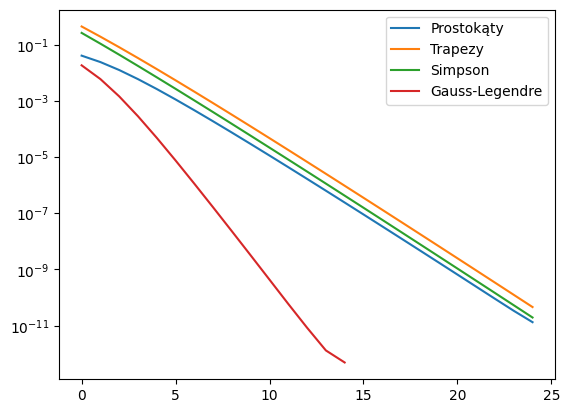

In [20]:
integrate_f(f2,-4/9)

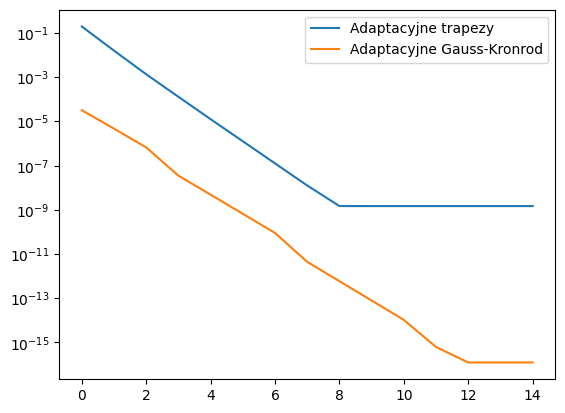

In [16]:
integrate_s(f2,-4/9)

Rząd zbieżności empiryczny - prostokąty 4.22
Rząd zbieżności empiryczny - trapezy 4.23
Rząd zbieżności empiryczny - Simpson 3.7
hmin - prostokąty 5.96e-08
hmin - trapezy 5.96e-08
hmin - Simpson 6.1e-05


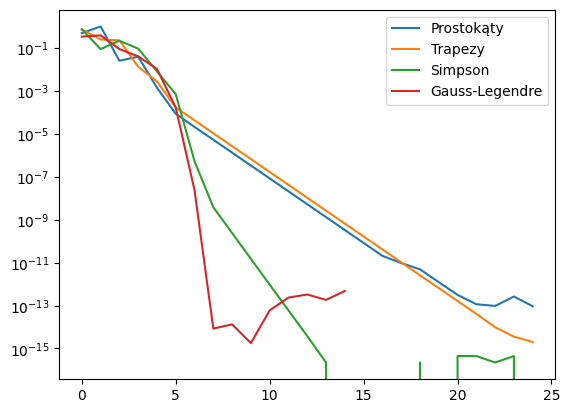

In [17]:
rval = fkfun(0.3,0.001) + fkfun(0.9,0.004) - 6
integrate_f(f3,rval)

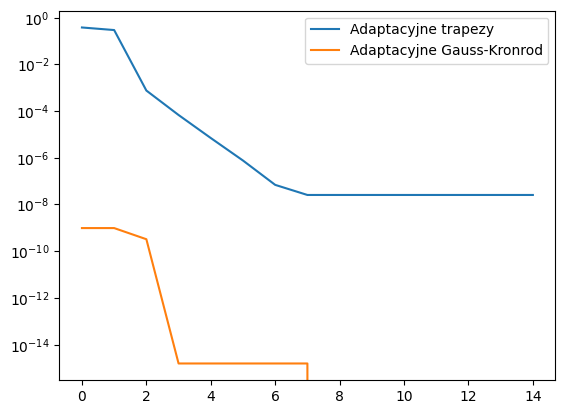

In [18]:
integrate_s(f3,rval)